In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [6]:
# Load the dataset
data = pd.read_csv(r'C:\Users\prane\Downloads\SpreadSheets\extended_fmcg_demand_forecasting.csv')

# Display the first few rows of the dataset
data.head()


,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
0,2022-01-01,Household,1583,5.190661,0,Urban,5,9.299281,9,207
1,2022-01-02,Personal Care,1103,8.949596,0,Urban,6,13.274109,5,253
2,2022-01-03,Dairy,455,4.867987,0,Rural,0,13.302265,9,245
3,2022-01-04,Personal Care,1107,16.968596,1,Urban,1,10.056158,5,265
4,2022-01-05,Personal Care,1447,4.309673,1,Rural,2,3.562862,8,334


In [7]:
# Check the structure of the dataset
data.info()

# Check for missing values
data.isnull().sum()

# Get basic statistics of the dataset
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1000 non-null   object 
 1   Product_Category         1000 non-null   object 
 2   Sales_Volume             1000 non-null   int64  
 3   Price                    1000 non-null   float64
 4   Promotion                1000 non-null   int64  
 5   Store_Location           1000 non-null   object 
 6   Weekday                  1000 non-null   int64  
 7   Supplier_Cost            1000 non-null   float64
 8   Replenishment_Lead_Time  1000 non-null   int64  
 9   Stock_Level              1000 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 78.3+ KB


,Sales_Volume,Price,Promotion,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1048.781000,10.362358,0.491000,2.999000,7.552047,4.970000,266.494000
std,539.688298,5.420627,0.500169,2.001751,4.163729,2.589944,130.560078
min,101.000000,1.003580,0.000000,0.000000,0.500445,1.000000,50.000000
25%,591.750000,5.541108,0.000000,1.000000,3.887763,3.000000,152.000000
50%,1064.500000,10.404366,0.000000,3.000000,7.422058,5.000000,260.000000
75%,1489.000000,15.054035,1.000000,5.000000,11.099853,7.000000,376.000000
max,1997.000000,19.944485,1.000000,6.000000,14.993587,9.000000,499.000000


In [9]:
data = data.dropna()


In [10]:
data['Sales_Volume'] = data['Sales_Volume'].fillna(data['Sales_Volume'].median())


In [11]:
data = data.drop_duplicates()

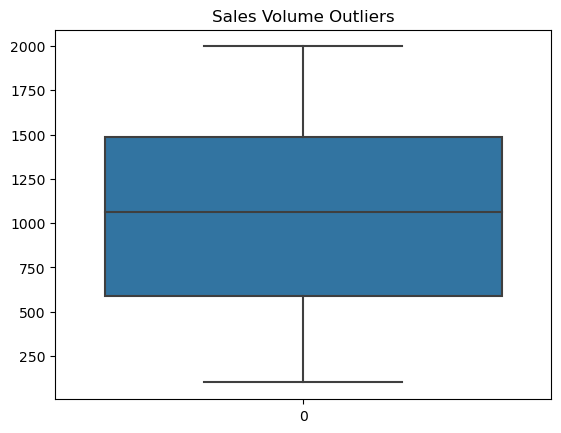

In [12]:
# Visualizing outliers using a box plot for 'Sales_Volume'
sns.boxplot(data['Sales_Volume'])
plt.title('Sales Volume Outliers')
plt.show()

# Optionally remove outliers using Z-score method or IQR
from scipy import stats
data = data[(np.abs(stats.zscore(data['Sales_Volume'])) < 3)]  # Remove outliers based on Z-score


In [16]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check if conversion worked
data.info()

# Now you can extract the Year, Month, and Weekday
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.weekday

# Display the updated data
data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     1000 non-null   datetime64[ns]
 1   Product_Category         1000 non-null   object        
 2   Sales_Volume             1000 non-null   int64         
 3   Price                    1000 non-null   float64       
 4   Promotion                1000 non-null   int32         
 5   Store_Location           1000 non-null   object        
 6   Weekday                  1000 non-null   int64         
 7   Supplier_Cost            1000 non-null   float64       
 8   Replenishment_Lead_Time  1000 non-null   int64         
 9   Stock_Level              1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4), object(2)
memory usage: 74.3+ KB


,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level,Year,Month
0,2022-01-01,Household,1583,5.190661,0,Urban,5,9.299281,9,207,2022,1
1,2022-01-02,Personal Care,1103,8.949596,0,Urban,6,13.274109,5,253,2022,1
2,2022-01-03,Dairy,455,4.867987,0,Rural,0,13.302265,9,245,2022,1
3,2022-01-04,Personal Care,1107,16.968596,1,Urban,1,10.056158,5,265,2022,1
4,2022-01-05,Personal Care,1447,4.309673,1,Rural,2,3.562862,8,334,2022,1


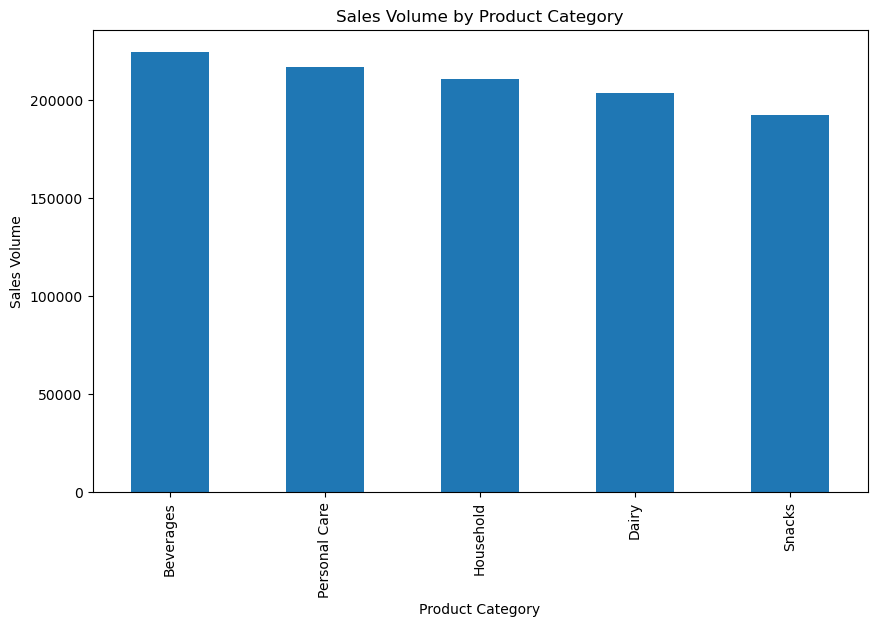

In [15]:
# Group sales by product category and visualize
category_sales = data.groupby('Product_Category')['Sales_Volume'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales Volume by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Volume')
plt.show()


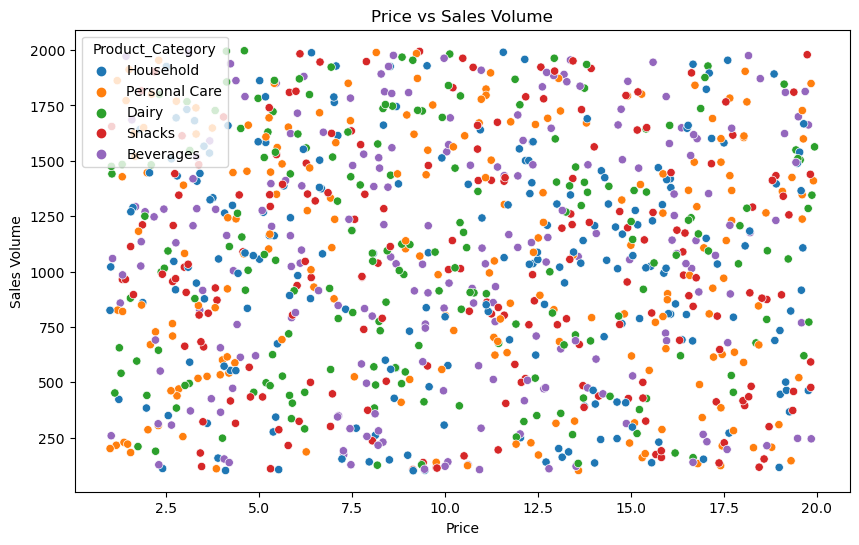

In [18]:
# Plot Price vs Sales Volume to see any correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Price', y='Sales_Volume', hue='Product_Category')
plt.title('Price vs Sales Volume')
plt.xlabel('Price')
plt.ylabel('Sales Volume')
plt.show()


### There is no strong linear correlation between price and sales volume, indicating price elasticity varies across categories. Dense distribution across all price points suggests that other factors (e.g., promotions, stock availability, brand strength) influence purchase behavior more than price alone.



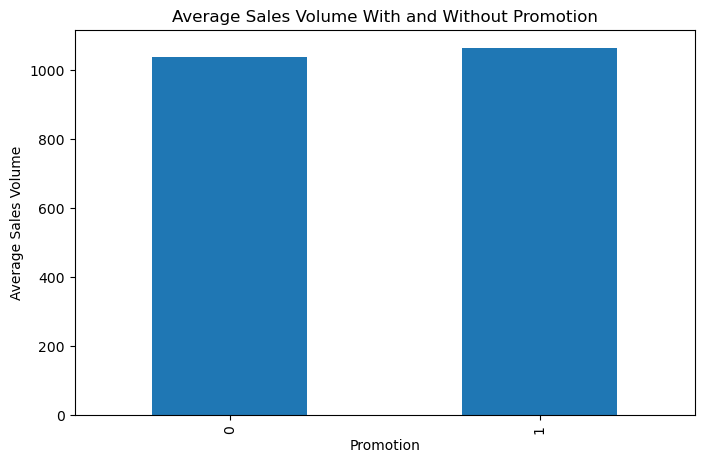

In [37]:
# Compare average sales with and without promotions
promotion_sales = data.groupby('Promotion')['Sales_Volume'].mean()
promotion_sales.plot(kind='bar', figsize=(8, 5))
plt.title('Average Sales Volume With and Without Promotion')
plt.xlabel('Promotion')
plt.ylabel('Average Sales Volume')
plt.show()

### Promotions led to a marginal increase in average sales volume (approx. +2-3%). While the increase is visible, it is not statistically dramatic, implying that promotions alone aren't driving high spikes — context like timing, category, and season might matter more.

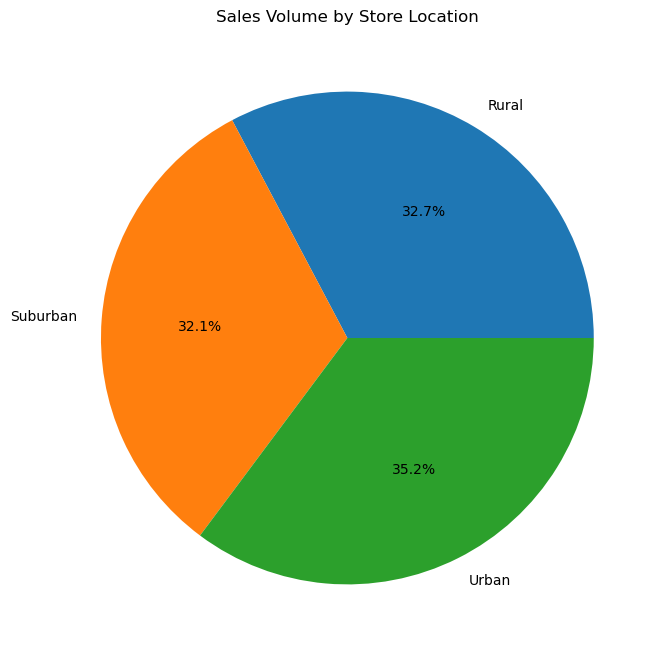

In [20]:
# Compare sales volume by location
location_sales = data.groupby('Store_Location')['Sales_Volume'].sum()
location_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Sales Volume by Store Location')
plt.ylabel('')
plt.show()

### Urban locations dominate with 35.2% of sales. Rural and Suburban areas are almost equally split (~32% each). Marketing and inventory strategies should prioritize urban centers while also customizing offerings for rural vs suburban preferences.

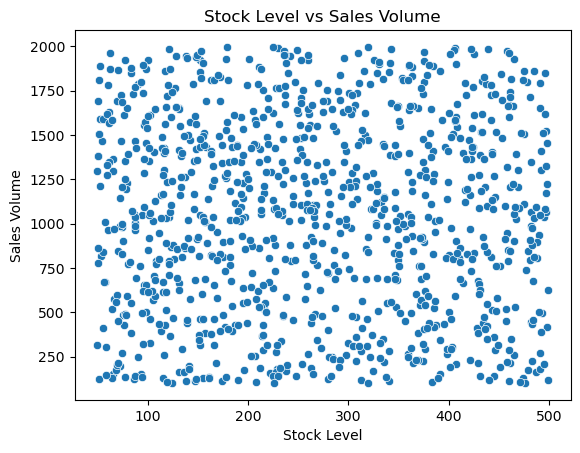

In [21]:
# Correlation between stock level and sales volume
sns.scatterplot(data=data, x='Stock_Level', y='Sales_Volume')
plt.title('Stock Level vs Sales Volume')
plt.xlabel('Stock Level')
plt.ylabel('Sales Volume')
plt.show()

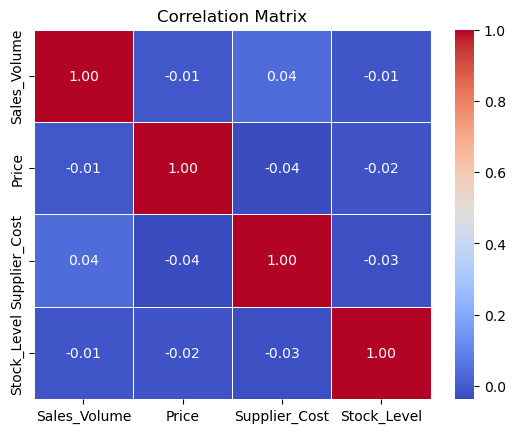

In [22]:
# Calculate the correlation matrix
corr_matrix = data[['Sales_Volume', 'Price', 'Supplier_Cost', 'Stock_Level']].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Very weak correlation between Sales Volume and variables like Price, Supplier Cost, and Stock Level. Suggests that non-linear factors or external demand influencers (e.g., holidays, weather, brand loyalty) may play a larger role.

In [25]:
# Save the cleaned data to a new CSV
data.to_csv(r'C:\Users\prane\Downloads\SpreadSheets\extended_fmcg_demand_forecasting.csv', index=False)

<Axes: xlabel='Product_Category'>

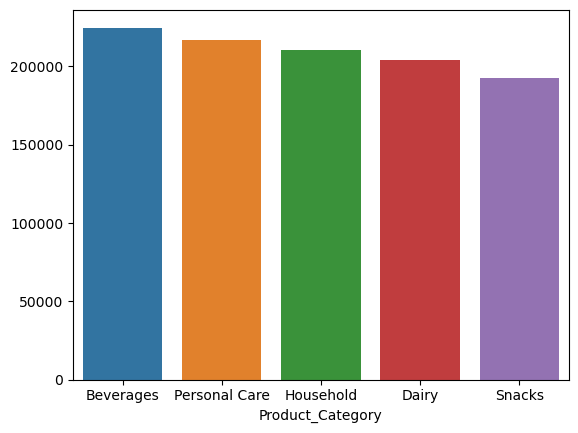

In [27]:
category_sales = data.groupby('Product_Category')['Sales_Volume'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values)


### Beverages lead in total sales volume, followed closely by Personal Care and Household items.Snacks have the lowest total sales but are not significantly behind, suggesting a fairly balanced category demand distribution.  Strategic focus could be on beverages for new promotions, and snacks may benefit from more aggressive marketing.

<Axes: xlabel='Price', ylabel='Sales_Volume'>

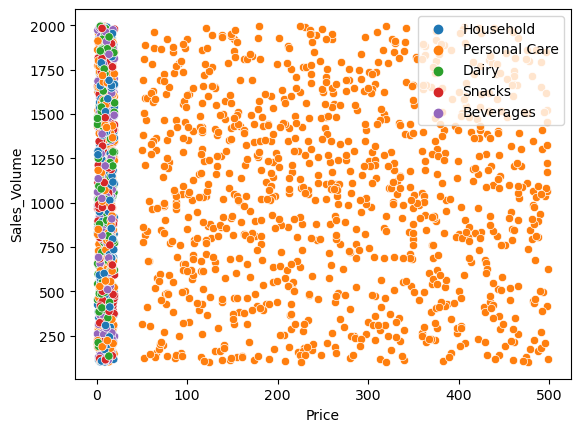

In [28]:
sns.scatterplot(data=data, x='Price', y='Sales_Volume', hue='Product_Category')
sns.scatterplot(data=data, x='Stock_Level', y='Sales_Volume')

### Personal Care products exhibit a wide price dispersion, with  prices ranging up to $500, yet maintain consistent sales volumes, indicating strong brand value or low price sensitivity in this category.

### "Other product categories, such as Beverages, Dairy, Snacks, and Household, are concentrated within a narrow low-price range (under $20), suggesting their demand is more price-sensitive and potentially volume-driven."